## Text-Classifier

This is Learning project

This main aim of this project is the classification of a given text into one of the five types which are Financial, Office & Work, Family and friends, Advertisement and promos and Travel related



Future Usage of this classification may be used to classify and then categorise different emails, whatsapp chats and may be books according to different categories and it can help users to deal with different texts according to their interest and priority thus saving time and making things more smooth and systematic

1. Importing all important libraries and models

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Loading data and making a panda dataframe out of it

In [156]:
df = pd.read_csv("text_classifier_dataset.csv")

In [157]:
df

,Unnamed: 0,Text,Category
0,0,The stock market experienced significant volat...,Financial
1,1,Investors are optimistic about the company's q...,Financial
2,2,The central bank announced a new interest rate...,Financial
3,3,Cryptocurrency prices surged after regulatory ...,Financial
4,4,The bond market remains stable despite economi...,Financial
...,...,...,...
244,244,Discover why millions trust our brand.,Advertisement & Promos
245,245,Indulge in luxury without the luxury price tag.,Advertisement & Promos
246,246,Find your perfect fit with our size guide.,Advertisement & Promos
247,247,Elevate your workout with our performance gear.,Advertisement & Promos


Removing not required column Unnamed

In [158]:
df.drop("Unnamed: 0", axis = 1, inplace = True )

In [159]:
df

,Text,Category
0,The stock market experienced significant volat...,Financial
1,Investors are optimistic about the company's q...,Financial
2,The central bank announced a new interest rate...,Financial
3,Cryptocurrency prices surged after regulatory ...,Financial
4,The bond market remains stable despite economi...,Financial
...,...,...
244,Discover why millions trust our brand.,Advertisement & Promos
245,Indulge in luxury without the luxury price tag.,Advertisement & Promos
246,Find your perfect fit with our size guide.,Advertisement & Promos
247,Elevate your workout with our performance gear.,Advertisement & Promos


Shuffling my dataframe so that there is no pattern

In [160]:
df = df.sample(frac=1).reset_index(drop=True)

In [161]:
df.head(10)

,Text,Category
0,The currency devaluation has affected import p...,Financial
1,The movie ticket came with a free popcorn vouc...,Travel
2,We need to get our bus tickets early to avoid ...,Travel
3,The conference room is booked for the entire a...,Office & Work
4,We upgraded our plane tickets to first class.,Travel
5,They are a source of strength for each other.,Family and Friends
6,They waited in line to buy tickets for the con...,Travel
7,Explore our wide range of flavors and indulge ...,Advertisement & Promos
8,He showed his ticket to the conductor on the t...,Travel
9,Revolutionize your morning routine.,Advertisement & Promos


Finding any null values if present

<Axes: >

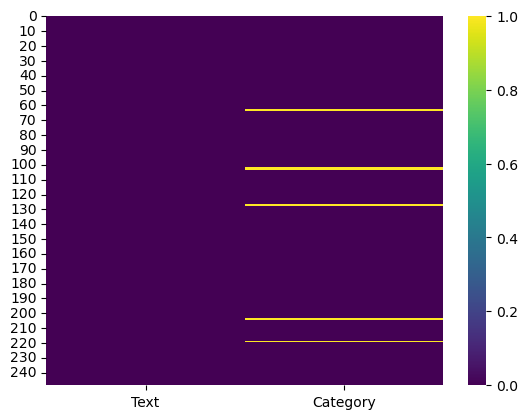

In [162]:
snb.heatmap(df.isnull(), cmap='viridis')

Filling all na values with NILL

In [163]:
df.fillna('NIL', inplace = True)

In [164]:

df.isna().sum()

Text        0
Category    0
dtype: int64

Again checking null values using seaborn

<Axes: >

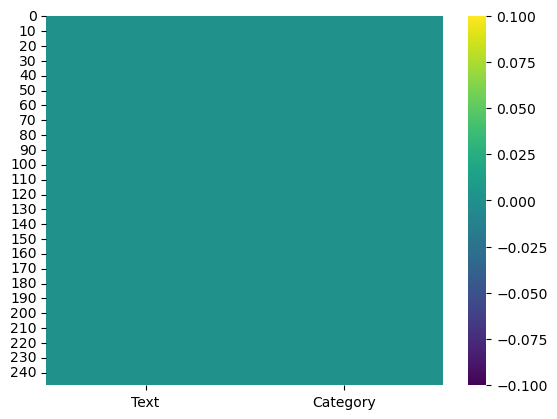

In [165]:
snb.heatmap(df.isnull(), cmap='viridis')

Dividing dataframe into variable and target

In [166]:
X = df['Text']
Y = df['Category']

Now using Count Vectorizer method from sklearn to extract data from text of variable and convert to matrix of tokens

In [167]:
vectorizer = CountVectorizer()
X_encoded = vectorizer.fit_transform(X)


Using labelencoder to encode values of categorical values

In [168]:
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

In [169]:
print("Target shape", Y_encoded.shape)
print("variable shape", X_encoded.shape)


Target shape (249,)
variable shape (249, 832)


Checking if the number of samples in X_encoded and Y_encoded equivalent

In [170]:
assert X_encoded.shape[0] == Y_encoded.shape[0], "Mismatch between feature and target sizes"

Dividing into test and train dataset and printing Xtrain shape

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_encoded, train_size = 0.80)
print("Training dataset size :", X_train.shape)
print("\n Test dataset shape : ", X_test.shape)

Training dataset size : (199, 832)

 Test dataset shape :  (50, 832)


Using Random Forest classifier to classify texts

In [172]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

Now testing the model against test dataset and finding accuracy


In [173]:
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.82

Using SVM

In [174]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

Testing SVM

In [175]:

Y_pred_svm = svm.predict(X_test)
accuracy_score(Y_test, Y_pred_svm)

0.82

Now using cross validation score for random forest classifier

In [176]:
cross_val_score(RandomForestClassifier(), X_encoded, Y_encoded, cv=10)


c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([0.88      , 0.84      , 0.88      , 0.76      , 0.88      ,
       0.88      , 0.92      , 0.96      , 0.8       , 0.83333333])

Now using cross validation score for support vector machine classifier

In [177]:
cross_val_score(SVC(), X_encoded, Y_encoded, cv = 10)

c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 0.92      , 0.92      , 0.8       , 0.92      ,
       0.88      , 0.88      , 0.92      , 0.84      , 0.79166667])

Pedicting random sentences from model

In [179]:
#checking for sample sentence
sen = ["We are going on a tour"]
#encodeing the sentence using vectorizer
sen_vector = vectorizer.transform(sen)
y_new_rfc = rfc.predict(sen_vector)
y_new_svm = svm.predict(sen_vector)
#decoding the predicted result
y_new_rfc = le.inverse_transform(y_new_rfc)
y_new_svm = le.inverse_transform(y_new_svm)
print("Predicted result using random forest:", y_new_rfc)
print("Predicted result using SVM:", y_new_svm)


Predicted result using random forest: ['Travel']
Predicted result using SVM: ['Advertisement & Promos']


On testing for random samples it is giving very bad prediction so now we will use some other vectorizer to encode our data more precisely and will use another cross validation technique grid search cv more accurate results

now using another vectorizer Tfidf

In [127]:
vectorizer_2 = TfidfVectorizer(ngram_range=(1, 2))  
X_encoded_2 = vectorizer_2.fit_transform(X)


Splittinfg into test and training

In [129]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_encoded_2, Y_encoded, train_size=0.85)

Hyperparameter tuning for grid search cv for svm

In [137]:
#testing for best parameter
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv = 5)
grid_svm.fit(X_train_2, Y_train_2)
#finding best parameter and using it
best_svm = grid_svm.best_estimator_
Y_pred_svm = best_svm.predict(X_test_2)
print("Classification report for grid search with svm :", classification_report(Y_test_2, Y_pred_svm))

Classification report for grid search with svm :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92         6
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         6

    accuracy                           0.95        38
   macro avg       0.79      0.81      0.80        38
weighted avg       0.93      0.95      0.94        38



c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter tuning for grid search CV for randomforest


In [136]:
# testing for best parameter
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv = 5)
grid_rf.fit(X_train_2, Y_train_2)
#finding best parameter and using it
best_rf = grid_rf.best_estimator_
Y_pred_rf = best_rf.predict(X_test_2)
print("Classsification Report for RF :", classification_report(Y_test_2, Y_pred_rf))


Classsification Report for RF :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92         6
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         6

    accuracy                           0.95        38
   macro avg       0.79      0.81      0.80        38
weighted avg       0.93      0.95      0.94        38



c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now testing these models for random Sentences for newly trained svm and randomforest

In [180]:
# samle sentence
sample = ["We are going on a tour"]
#Encoding the sentence using vectorizer in form of tokens
sample_vector = vectorizer_2.transform(sample)
#predicting results using trained models
y_sample_rf = best_rf.predict(sample_vector)
y_sample_svm = best_svm.predict(sample_vector)
#now decoding the predicted result obtained
y_sample_rf = le.inverse_transform(y_sample_rf)
y_sample_svm = le.inverse_transform(y_sample_svm)

print("SVM category for sample :", y_sample_svm)
print("RandomForest category of smaple:", y_sample_rf)

SVM category for sample : ['Travel']
RandomForest category of smaple: ['Travel']


Plotting confusion Matrix for Randomforest with grid search

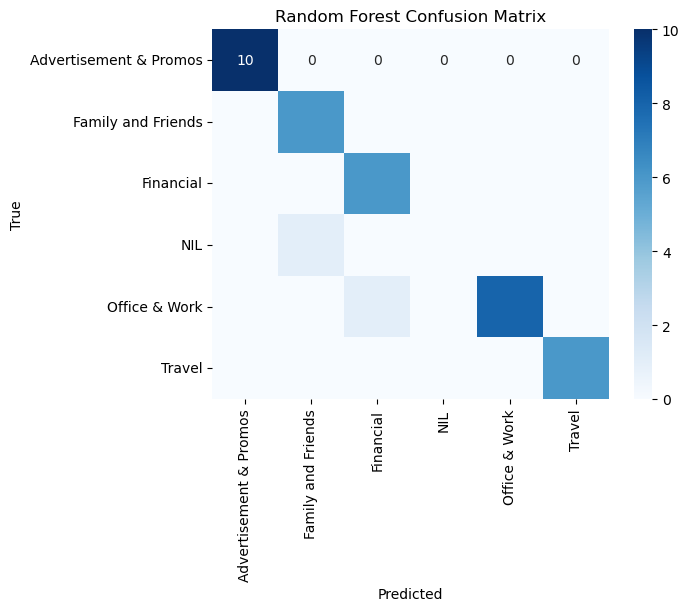

In [152]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(Y_test_2, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()


Plotting confusion Matrix for SVM with grid search

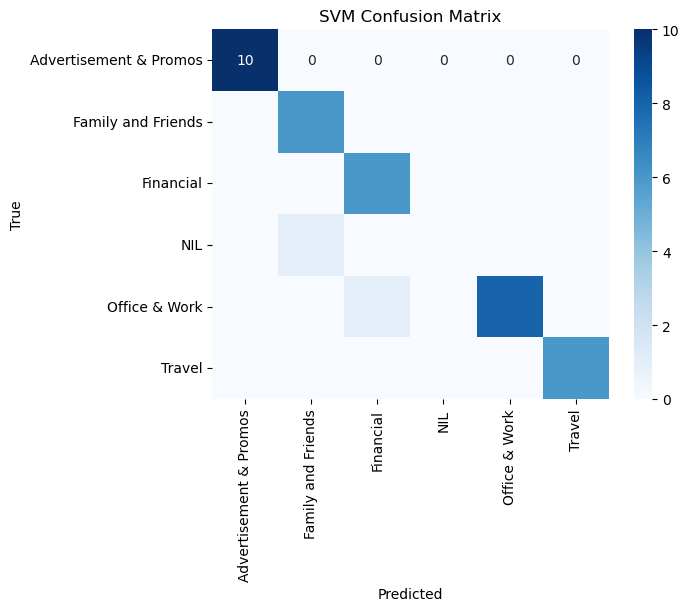

In [153]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(Y_test_2, Y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()
